## Visão Penguins
Um pouco mais do que só os penguins.... muita confiuguração do seaborn, de inclusões visuais importantissimas.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

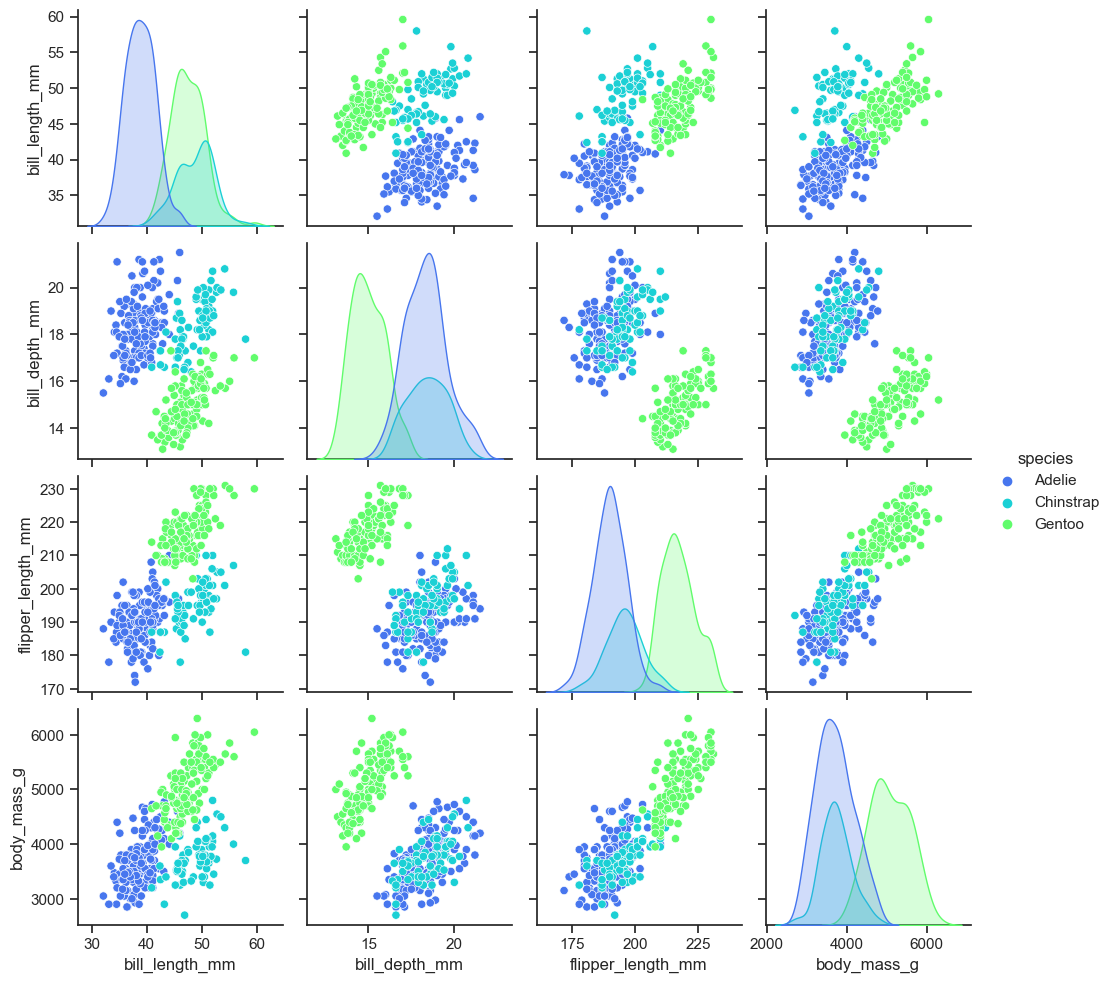

In [48]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_palette(palette='turbo')

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

In [49]:
# Renomear as colunas
df=df.rename(columns={'bill_length_mm': 'compr bico'
                  ,'bill_depth_mm': 'prof bico'
                  ,'flipper_length_mm': 'compr nadadeira'
                  , 'body_mass_g': 'massa corporal'})

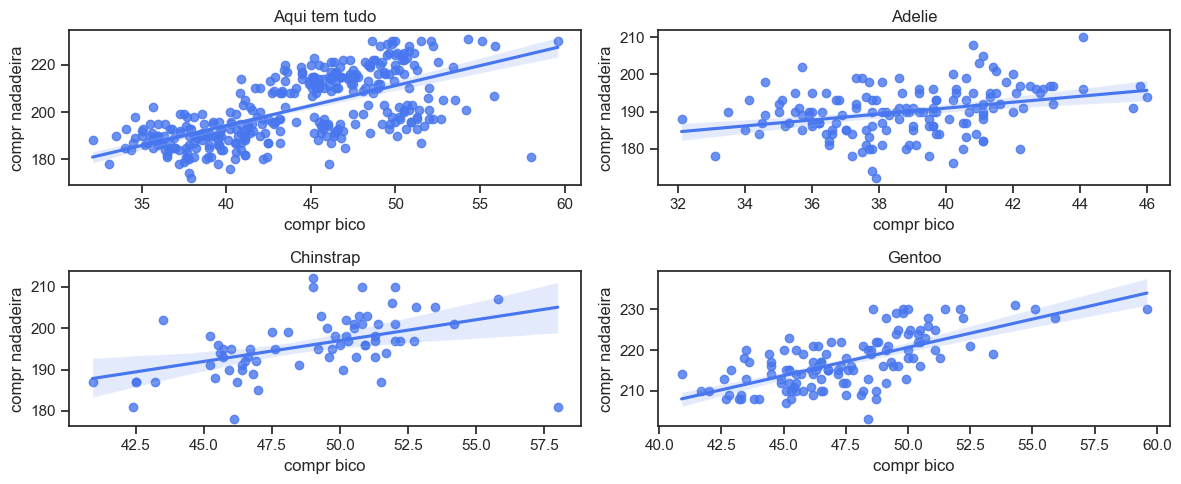

In [50]:
fig, g = plt.subplot_mosaic([[1,2],
                             [3,4]], figsize=(12, 5))

sns.regplot(data = df, x = 'compr bico', y = 'compr nadadeira', ax=g[1])
sns.regplot(data = df[df['species']=='Adelie'], x = 'compr bico', y = 'compr nadadeira', ax=g[2])
sns.regplot(data = df[df['species']=='Chinstrap'], x = 'compr bico', y = 'compr nadadeira', ax=g[3])
sns.regplot(data = df[df['species']=='Gentoo'], x = 'compr bico', y = 'compr nadadeira', ax=g[4])


g[1].set_title('Aqui tem tudo')
g[2].set_title('Adelie')
g[3].set_title('Chinstrap')
g[4].set_title('Gentoo')

# Ajustando o layout
plt.tight_layout()
# Mostrando os gráficos
plt.show()

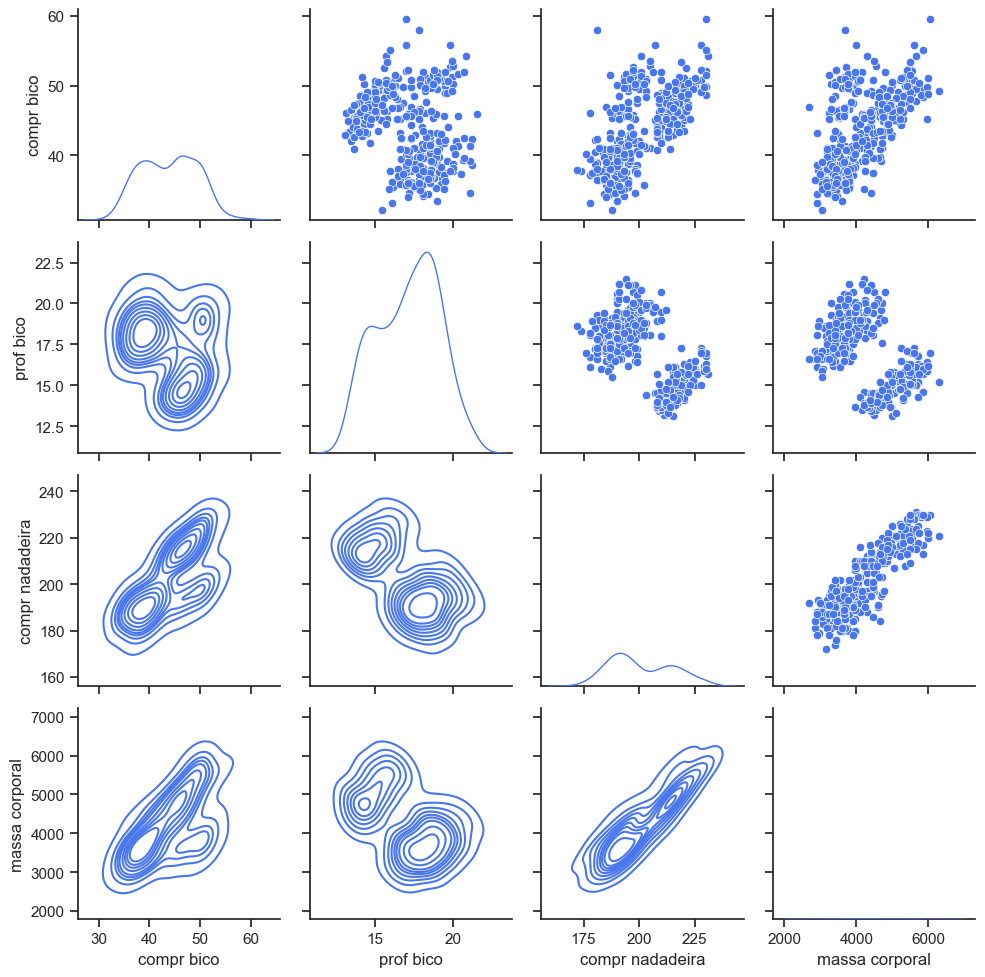

In [51]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot) # Na parte de cima ficará dispersão
g.map_lower(sns.kdeplot) # em baixo ficará curvas de nível
g.map_diag(sns.kdeplot, lw=1, legend=False) # densidade no cross dos mesmos atributos


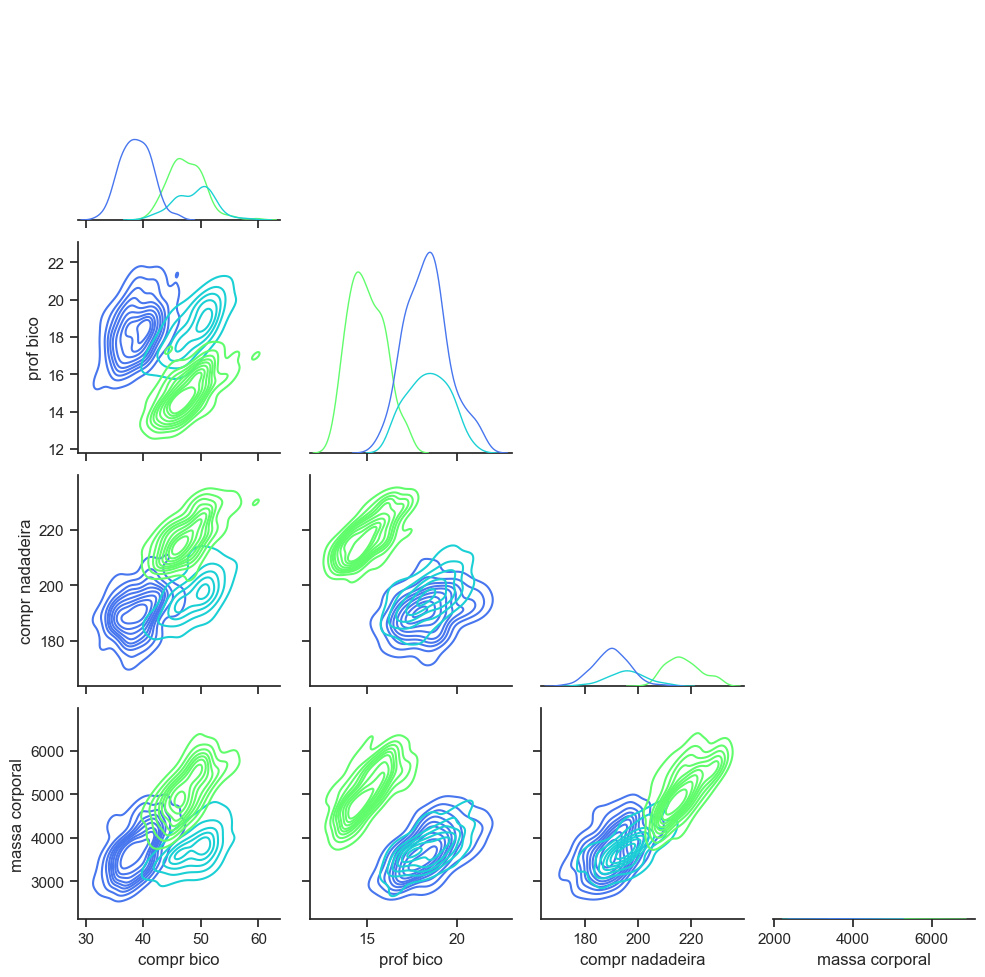

In [52]:
g = sns.PairGrid(df, corner=True, hue='species')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=1, legend=False)

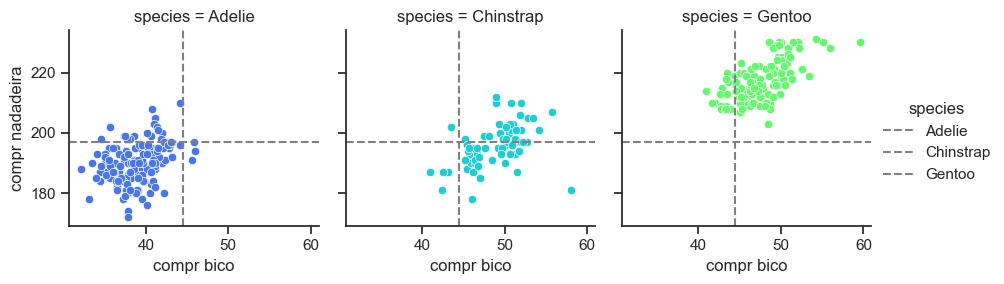

In [53]:
g = sns.FacetGrid(df, col='species', hue='species')
g.map_dataframe(sns.scatterplot, x="compr bico", y="compr nadadeira")

#linhas de referência
g.refline(y=df["compr nadadeira"].median()) 
g.refline(x=df["compr bico"].median())
g.add_legend()


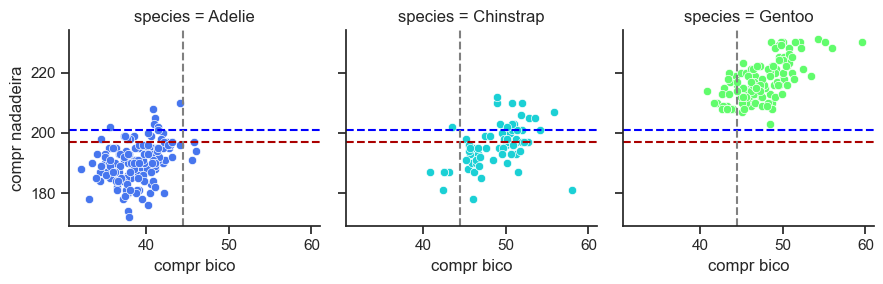

In [54]:
g = sns.FacetGrid(df, col='species', hue='species')
g.map_dataframe(sns.scatterplot, x="compr bico", y="compr nadadeira")

#linhas de referência // Aqui em baixo mostramos cada linha com uma cor diferente
g.refline(y=df["compr nadadeira"].median(),color='#a00') #R G B // linha mediana, aqui está abaixo da média.
g.refline(y=df["compr nadadeira"].mean(), color='#00f') # linha média aqui está acima da mediana.
g.refline(x=df["compr bico"].median())


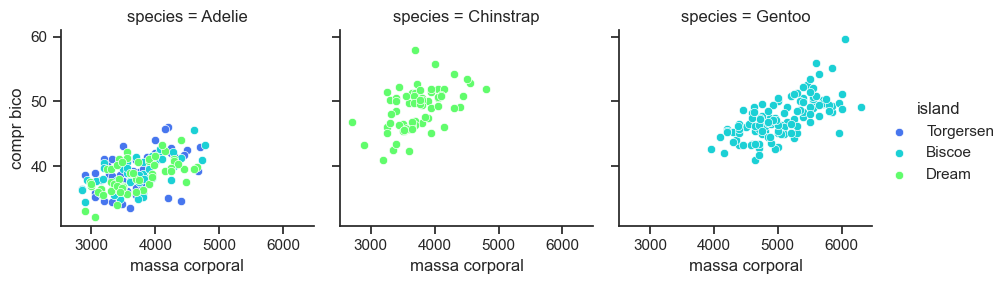

In [55]:
g = sns.FacetGrid(df, col="species", hue="island")
g.map_dataframe(sns.scatterplot, x="massa corporal", y="compr bico")
g.add_legend()

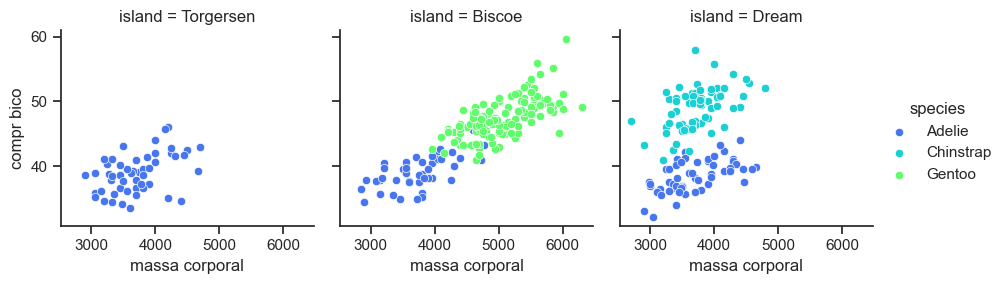

In [56]:
g = sns.FacetGrid(df, col="island", hue="species")
g.map_dataframe(sns.scatterplot, x="massa corporal", y="compr bico")
g.add_legend()

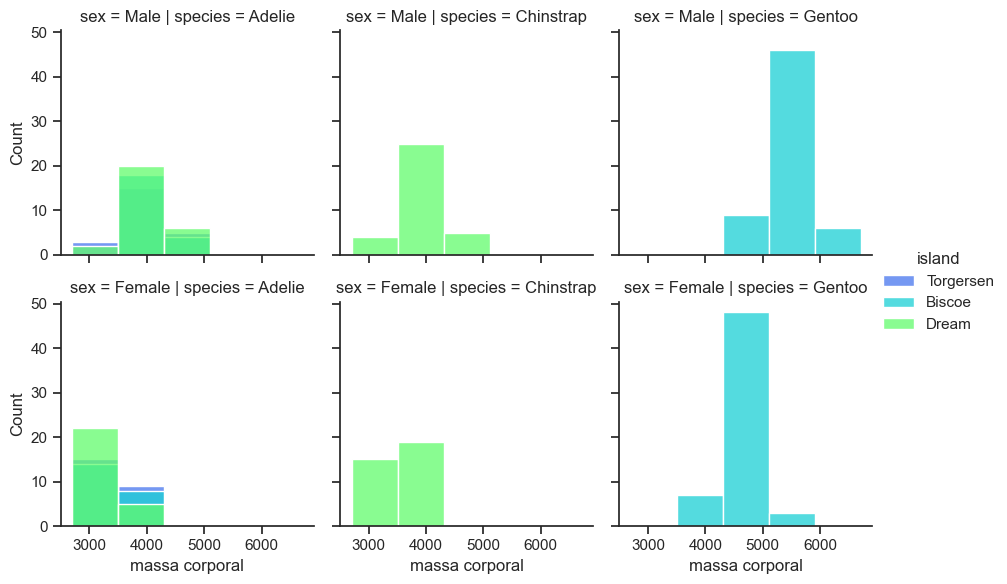

In [66]:
g = sns.FacetGrid(df, col="species", row="sex", hue='island')
g.map_dataframe(sns.histplot, x="massa corporal"
                ,binwidth=(df['massa corporal'].std()) # tamanho de cada bin, sugestão desvio padrão
                ,binrange=(df['massa corporal'].min(),df['massa corporal'].max()) # De-até, sugestão min e max
                )
g.add_legend()


<Axes: xlabel='compr bico', ylabel='Density'>

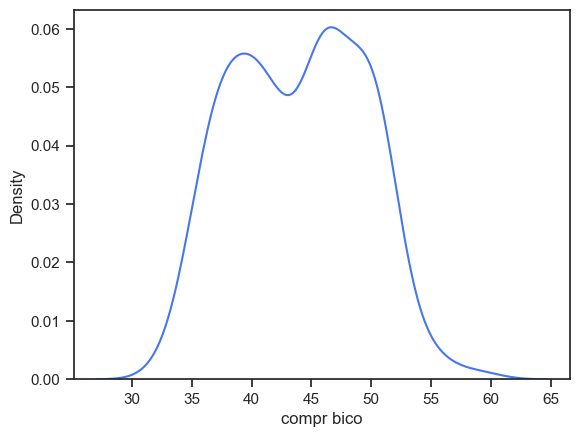

In [67]:
sns.kdeplot(data=df, x='compr bico')

<Axes: xlabel='massa corporal', ylabel='Density'>

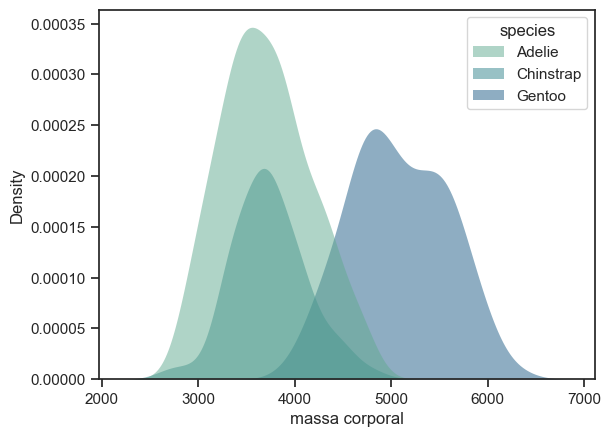

In [69]:
sns.kdeplot(data=df, x="massa corporal", hue="species", fill=True, common_norm=True, palette="crest", alpha=.5, linewidth=0,)

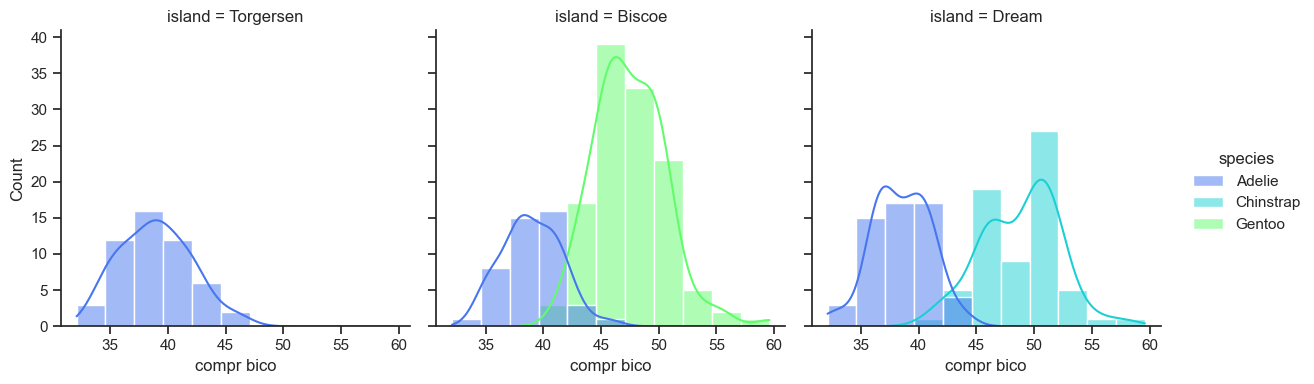

In [70]:
sns.displot(data = df, x = 'compr bico', kde = True, height=4, aspect=1, hue='species', kind='hist', col='island')

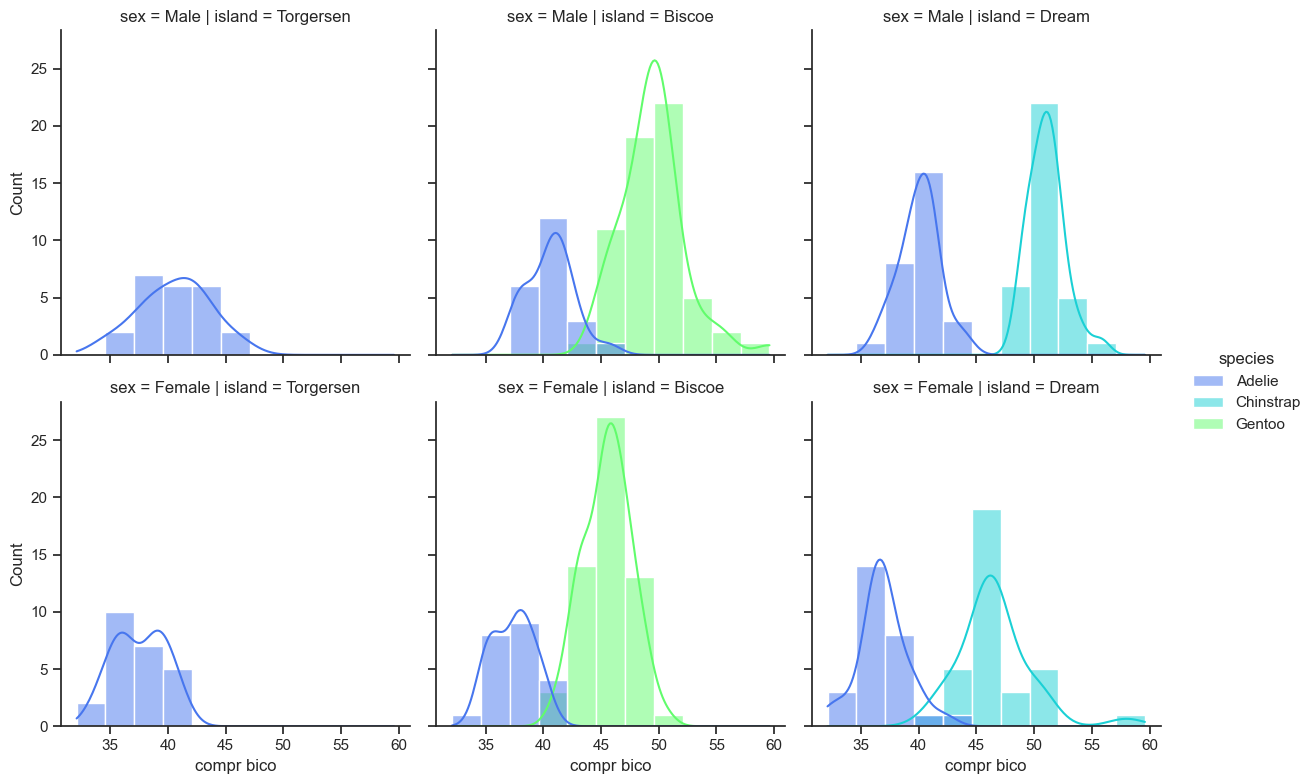

In [73]:
sns.displot(data = df, x = 'compr bico', kde = True, height=4, aspect=1, hue='species', kind='hist', col='island', row='sex')

C:\Users\fallg\AppData\Local\Temp\ipykernel_13848\61566155.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data = df, x = 'compr bico', kde = True, height=4, aspect=1, kind='hist', palette='tab20b')


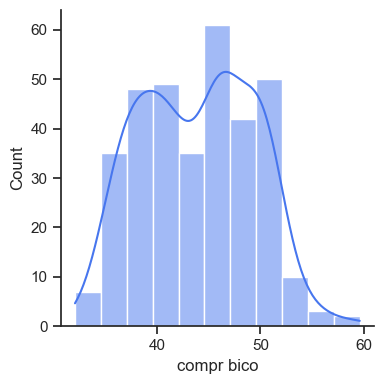

In [75]:
sns.displot(data = df, x = 'compr bico', kde = True, height=4, aspect=1, kind='hist', palette='tab20b')

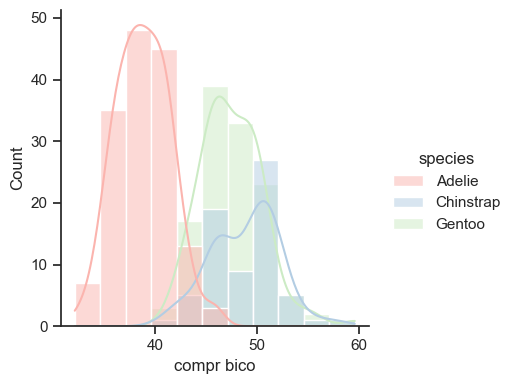

In [86]:
sns.displot(data = df, x = 'compr bico'
            ,hue = 'species'
            ,kde = True, height=4, aspect=1, kind='hist'
            ,palette ='Pastel1'
            #,palette='tab20b_r'
            )

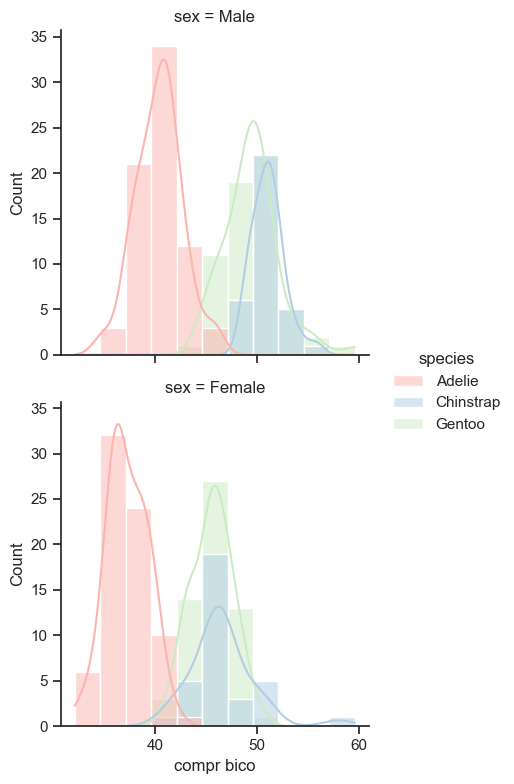

In [87]:
sns.displot(data = df, x = 'compr bico'
            ,hue = 'species', row='sex'
            ,kde = True, height=4, aspect=1, kind='hist'
            ,palette ='Pastel1'
            #,palette='tab20b_r'
            )

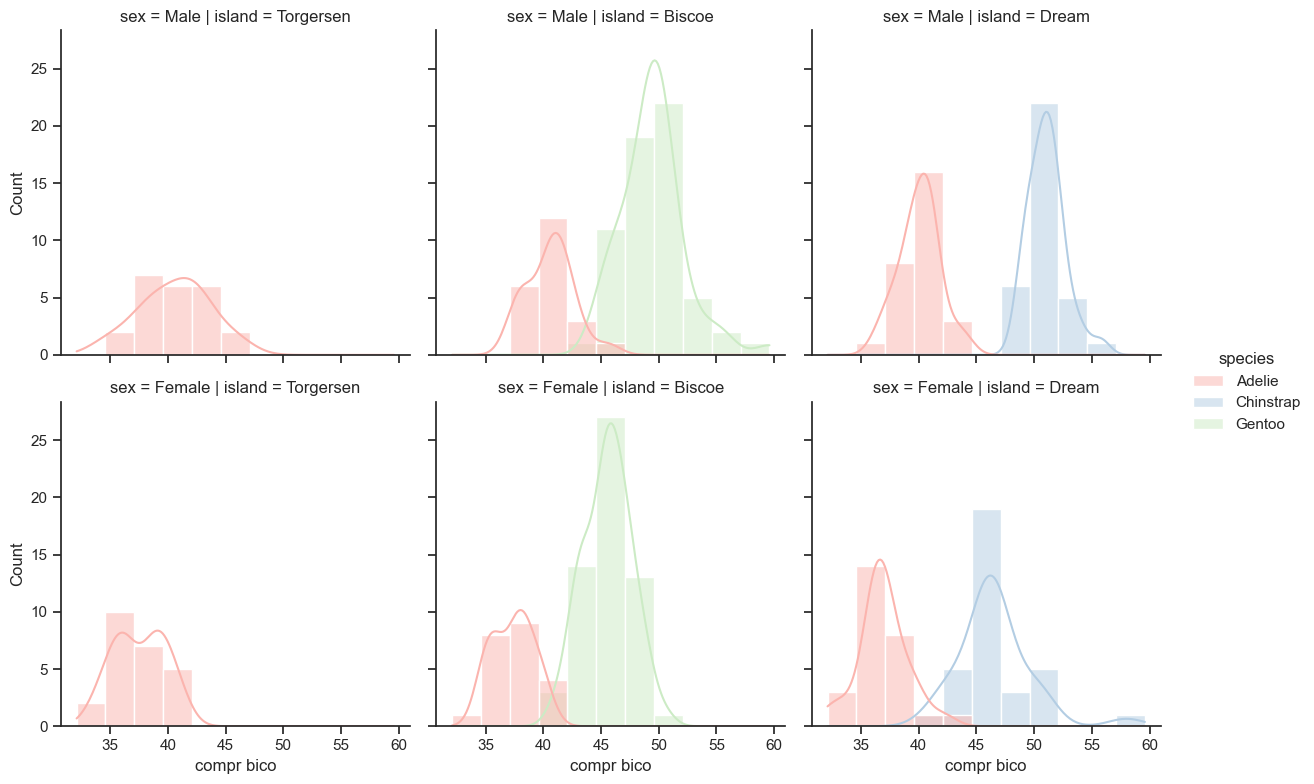

In [89]:
sns.displot(data = df, x = 'compr bico'
            ,hue = 'species', row='sex', col='island'
            ,kde = True, height=4, aspect=1, kind='hist'
            ,palette ='Pastel1'
            #,palette='tab20b_r'
            )

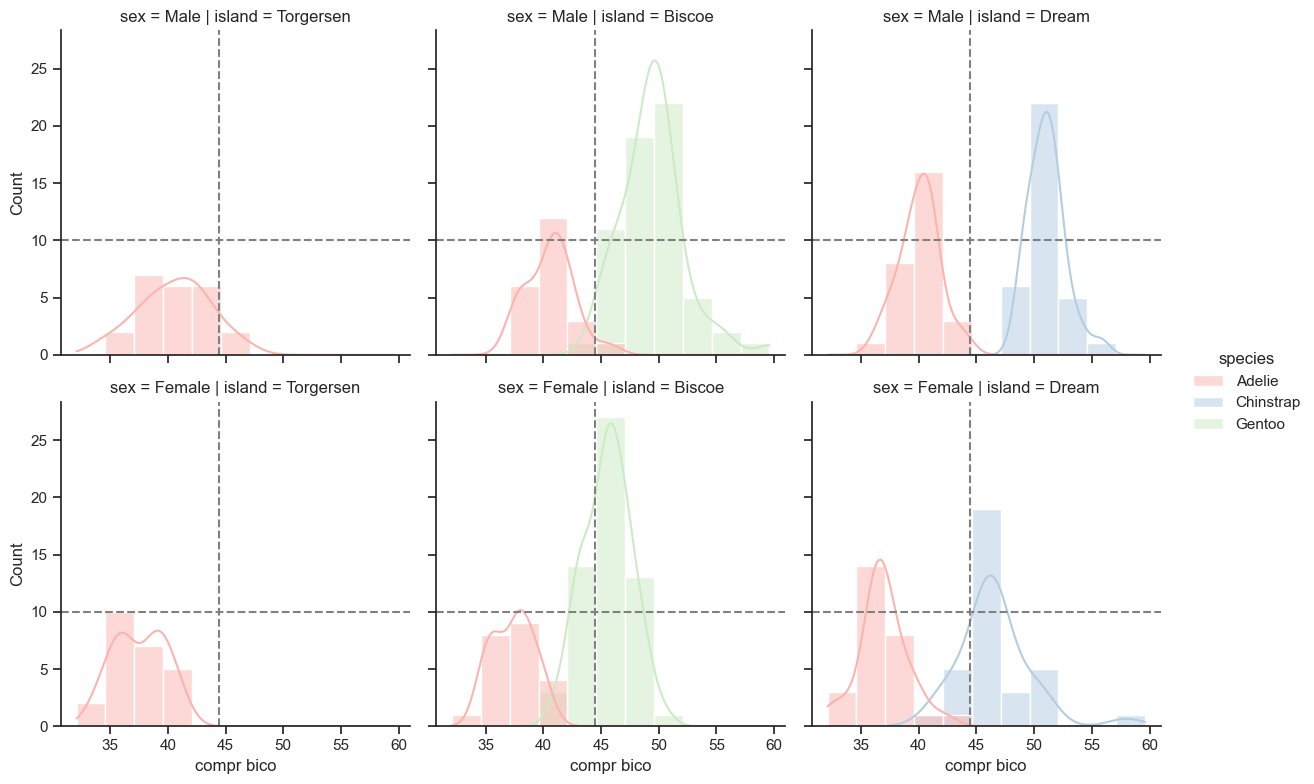

In [91]:
# incluindo uma linha arbitrária, x para a mediana e y = 10
g=sns.displot(data = df, x = 'compr bico'
            ,hue = 'species', row='sex', col='island'
            ,kde = True, height=4, aspect=1, kind='hist'
            ,palette ='Pastel1'
            #,palette='tab20b_r'
            )
g.refline(x=df["compr bico"].median(), y=10)

<Axes: >

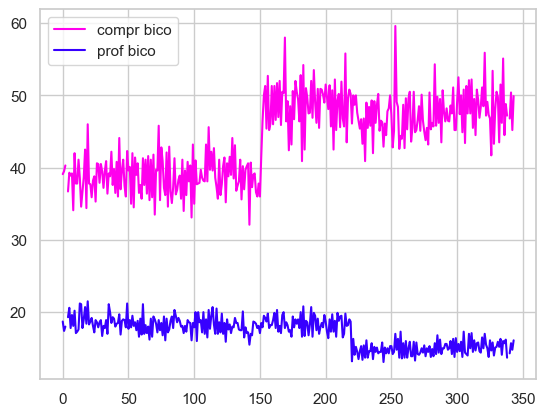

In [98]:
sns.set_theme(style='whitegrid')
sns.set_palette(palette='hsv_r')
df[['compr bico','prof bico']].plot()

<Axes: >

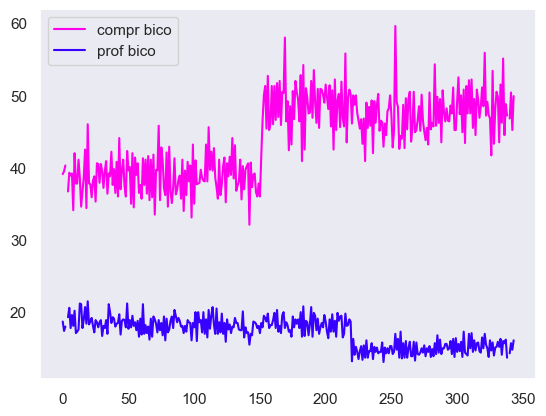

In [99]:
sns.set_theme(style='dark')
sns.set_palette(palette='hsv_r')
df[['compr bico','prof bico']].plot()

<Axes: >

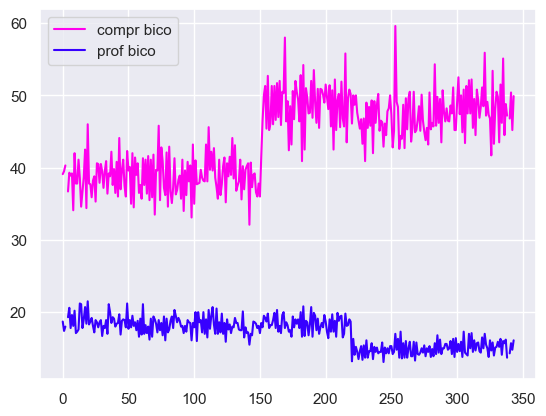

In [100]:
sns.set_theme(style='darkgrid')
sns.set_palette(palette='hsv_r')
df[['compr bico','prof bico']].plot()

<Axes: >

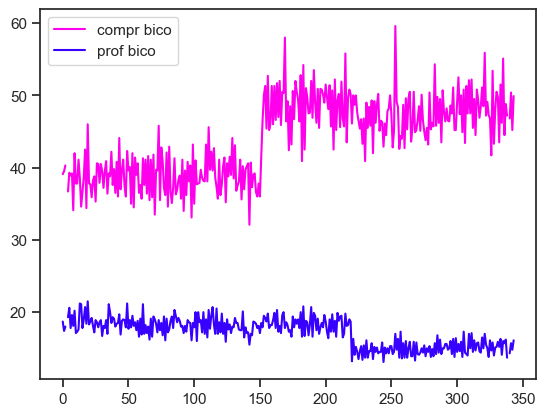

In [101]:
sns.set_theme(style='ticks')
sns.set_palette(palette='hsv_r')
df[['compr bico','prof bico']].plot()

<Axes: >

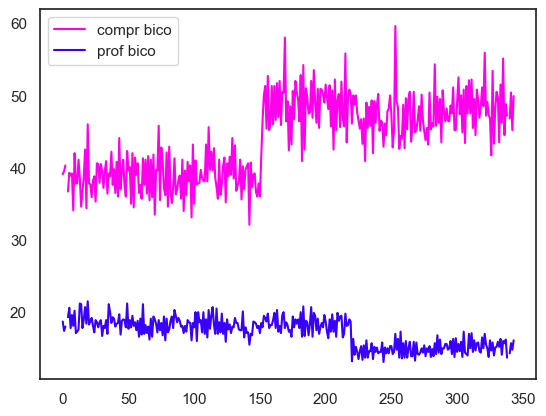

In [102]:
sns.set_theme(style='white')
sns.set_palette(palette='hsv_r')
df[['compr bico','prof bico']].plot()

<Axes: >

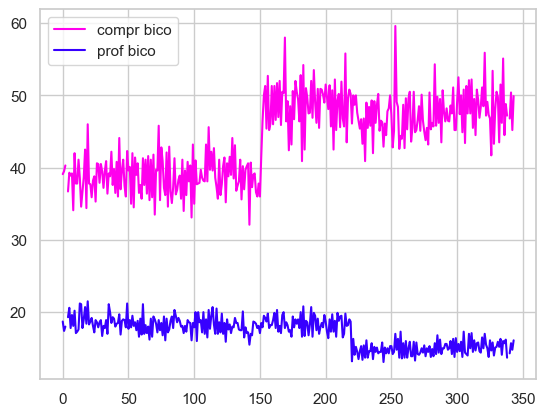

In [103]:
sns.set_theme(style='whitegrid')
sns.set_palette(palette='hsv_r')
df[['compr bico','prof bico']].plot()

<Axes: >

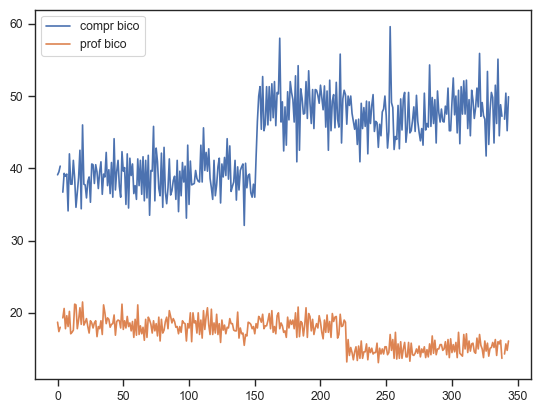

In [113]:
sns.set_theme(palette='deep', style='ticks', context='paper')

df[['compr bico','prof bico']].plot()

<Axes: >

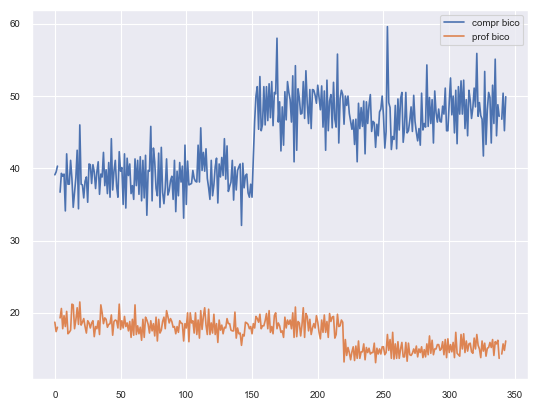

In [114]:
sns.set_theme(context='paper', style='darkgrid', palette='deep', font='sans-serif', font_scale=.8, color_codes=True, rc=None)
df[['compr bico','prof bico']].plot()

<Axes: >

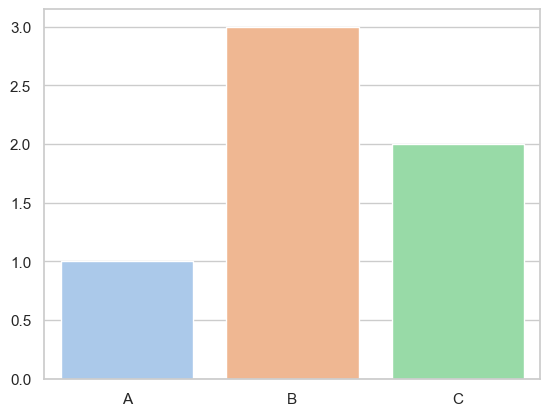

In [115]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

<Axes: >

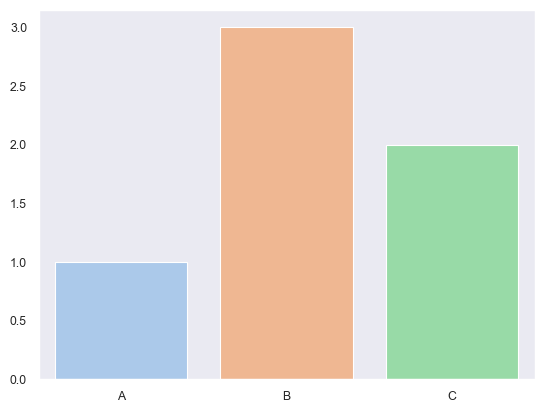

In [121]:
sns.set_theme(style='dark', palette="pastel", context='paper')
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

<Axes: >

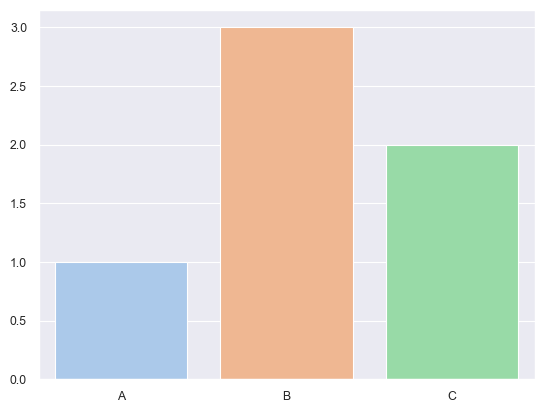

In [122]:
sns.set_theme(style='darkgrid', palette="pastel", context='paper')
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

<Axes: xlabel='massa corporal', ylabel='Count'>

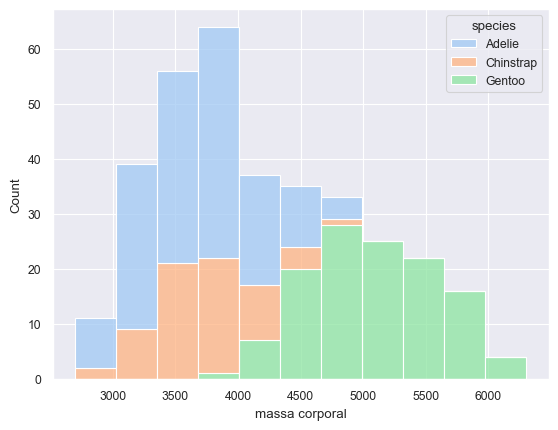

In [123]:
# O stack empilha os pedaços para não haver sobreposição.
sns.histplot(data=df,x='massa corporal',hue="species",multiple="stack")


<Axes: xlabel='massa corporal', ylabel='Count'>

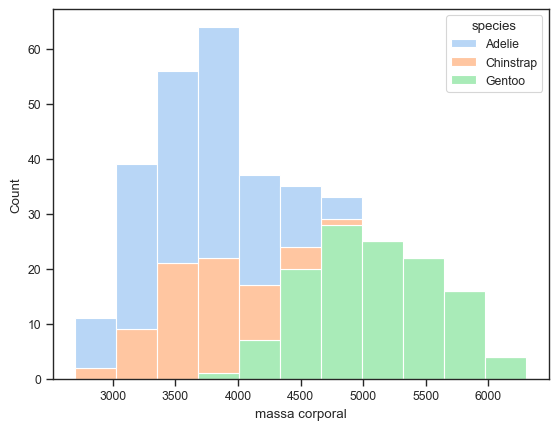

In [124]:
sns.set_theme(style='ticks', palette="pastel", context='paper')
# O stack empilha os pedaços para não haver sobreposição.
sns.histplot(data=df,x='massa corporal',hue="species",multiple="stack")

<Axes: xlabel='massa corporal', ylabel='Count'>

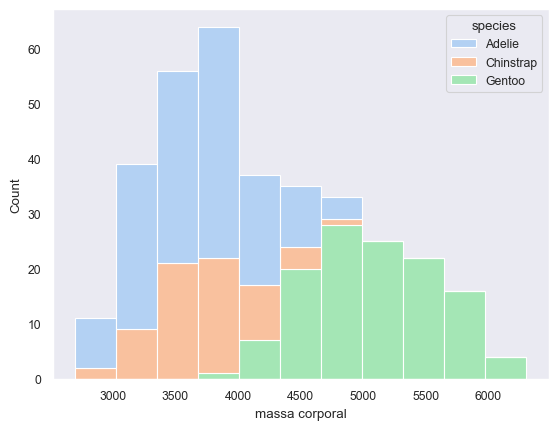

In [125]:
sns.set_theme(style='dark', palette="pastel", context='paper')
# O stack empilha os pedaços para não haver sobreposição.
sns.histplot(data=df,x='massa corporal',hue="species",multiple="stack")

<Axes: >

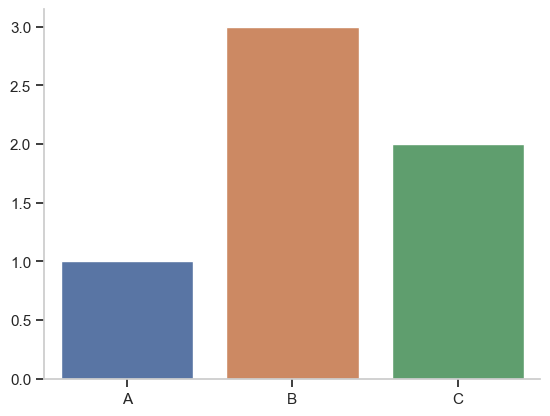

In [135]:
# Aqui é retirado as linhas da direita e do topo na configuração customizada
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'axes.edgecolor': '.8'}
sns.set_theme(style="ticks", rc=custom_params)
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

In [127]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False}

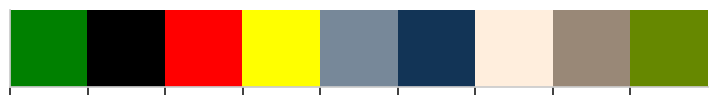

In [141]:
color = ["green", "black", "Red", "Yellow", "#789", "#123456","#FFEEDD","#998877","#680"] 
sns.set_palette(color) 
sns.palplot(sns.color_palette())

In [142]:
color = ["green", "black", "Red", "Yellow", "#789", "#123456","#FFEEDD","#998877","#680"] 
sns.set_palette(color) 


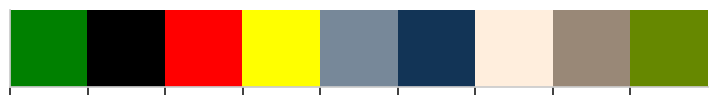

In [143]:
sns.palplot(sns.color_palette())

<Axes: >

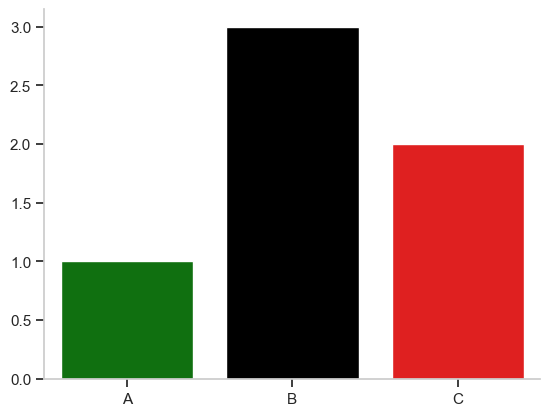

In [144]:
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])